<h2>Lấy dữ liệu từ Investing.com và phân tích dữ liệu cổ phiếu Việt Nam bằng investpy<h2>

<p>Hi mọi người, hôm trước mình có tình cờ tìm được một API để get dữ liệu cố phiếu của Việt Nam trên trang web investing.com nên muốn làm một project nhỏ để khi cần có thể xem lại, và cũng đồng thời giới thiệu đến những ai quan tâm đến việc get dữ liệu cổ phiếu Việt Nam để phân tích</p>
<p>Mọi người có thể đọc thêm documents <a href='https://pypi.org/project/investpy/'>ở đây</a> nhé!</p>
<p>Lưu ý đây không phải hướng dẫn phân tích chứng khoán mà bài viết chỉ nằm trong khuôn khổ lấy dữ liệu và thực hiện một số phân tích dựa trên dữ liệu thu thập được. Việc đánh giá một cổ phiếu có đáng mua hay không còn dựa trên nhiều yếu tố khác của doanh nghiệp chứ không chỉ dựa trên dữ liệu lịch sử của nó</p>

In [1]:
#pip install investpy

In [1]:
# Đầu tiên, chúng ta cần import những thư viện cần thiết cho việc phân tích
import investpy
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Chúng ta sẽ thử lấy dữ liệu của FLC nhé :)))

coPhieu = 'FLC'
start_date = '01/01/2020'
end_date = '01/01/2022'

df_FLC = investpy.get_stock_historical_data(stock=coPhieu,
                                        country='vietnam',
                                        from_date=start_date,
                                        to_date=end_date,
                                        order = "desc")
df_FLC.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-12-31,18700.0,18950.0,17850.0,18000.0,25541800,VND
2021-12-30,18650.0,19150.0,18400.0,18650.0,26267600,VND
2021-12-29,19000.0,19100.0,18200.0,18400.0,18879700,VND
2021-12-28,18400.0,19150.0,18250.0,19000.0,26314900,VND
2021-12-27,17800.0,18400.0,17450.0,18300.0,21716700,VND


In [3]:
#Chúng ta cũng có thể sử dụng thư viện datetime để lấy dữ liệu cổ phiếu tính đến thời điểm hiện tại
coPhieu = 'FLC'
start_date = '01/01/2020'
current = dt.datetime.now().strftime("%d/%m/%Y")

df_FLC = investpy.get_stock_historical_data(stock=coPhieu,
                                        country='vietnam',
                                        from_date=start_date,
                                        to_date=current,
                                        order = 'desc')
df_FLC.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-09-05,3720.0,3720.0,3720.0,3720.0,0,VND
2022-08-31,4010.0,4100.0,3940.0,4000.0,4346900,VND
2022-08-30,3620.0,4080.0,3620.0,4020.0,10153600,VND
2022-08-29,3890.0,3890.0,3890.0,3890.0,5936800,VND
2022-08-26,4180.0,4200.0,4180.0,4180.0,11856300,VND


<h3>Bây giờ mình sẽ thử làm một vài phân tích bằng biểu đồ nhé<h3>

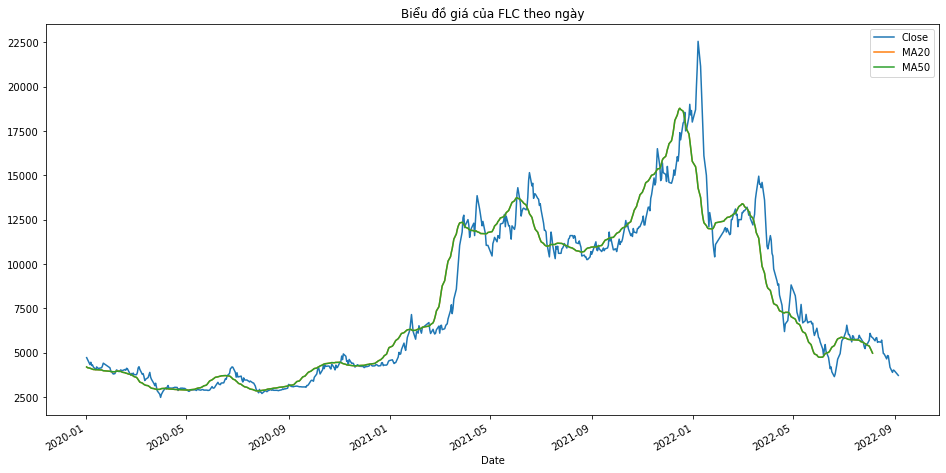

In [4]:
#Thêm các đường MA20, MA50 bằng rolling và lấy giá trị trung bình
df_FLC['MA20'] = df_FLC['Close'].rolling(20).mean()
df_FLC['MA50'] = df_FLC['Close'].rolling(20).mean()
df_FLC[['Close','MA20','MA50']].plot(label='FLC',figsize=(16,8))
plt.title('Biểu đồ giá của FLC theo ngày')
plt.show()

Đáng chú ý có thể thấy sự giảm đột ngột trong cổ phiếu của FLC trong khoảng nửa đầu tháng 1/2022, cùng tìm hiểu xem chuyện gì xảy ra tại thời điểm đó nhé.

<p>Mình đã dùng công cụ search nâng cao của google để tìm kiếm kết quả cho từ khóa "FLC tin tức" trong nửa đầu tháng 1/2022 thì tìm được <a href='https://vnexpress.net/uy-ban-chung-khoan-xem-xet-phat-ong-trinh-van-quyet-ban-chui-co-phieu-4414789.html'>bài báo này của vnexpress</a><p/>
<p>Theo như bài báo thì ông Trịnh Văn Quyết - Chủ tịch của FLC tại thời điểm đó đã "bán chui" 74.8 triệu cổ phiếu (chiếm khoảng 11% số lượng cố phiếu đang lưu hành) hôm 10/1 mà không công bố trước thông tin giao dịch. Thông tin trên khiến các nhà đầu tư hoang mang và nhanh chóng bán tháo số lượng cố phiếu mình đang năm giữ.</p>

In [5]:
#Cùng xem cố phiếu của FLC trong khoảng 20 ngày sau đó nhé
df_FLC.reset_index(inplace=True)
df_sub_FLC=df_FLC[df_FLC['Date'].between(dt.datetime(2022,1,10), dt.datetime(2022,1,30))]
df_sub_FLC

,Date,Open,High,Low,Close,Volume,Currency,MA20,MA50
146,2022-01-28,10500.0,11100.0,10050.0,11100.0,23105600,VND,12320.0,12320.0
147,2022-01-27,10800.0,11150.0,10200.0,10400.0,17762600,VND,12190.0,12190.0
148,2022-01-26,11300.0,11500.0,10450.0,10750.0,44367900,VND,12082.5,12082.5
149,2022-01-25,11300.0,11800.0,11200.0,11200.0,25748000,VND,11997.5,11997.5
150,2022-01-24,13400.0,13600.0,12000.0,12000.0,25910000,VND,11972.5,11972.5
151,2022-01-21,11300.0,12900.0,11300.0,12900.0,62434400,VND,11992.5,11992.5
152,2022-01-20,12100.0,12200.0,12100.0,12100.0,42901500,VND,11992.5,11992.5
153,2022-01-19,13000.0,13000.0,13000.0,13000.0,1332600,VND,12002.5,12002.5
154,2022-01-18,13950.0,13950.0,13950.0,13950.0,381100,VND,12062.5,12062.5
155,2022-01-17,15000.0,15000.0,15000.0,15000.0,728900,VND,12157.5,12157.5


Text(0.5, 1.0, 'Khối lượng giao dịch theo ngày')

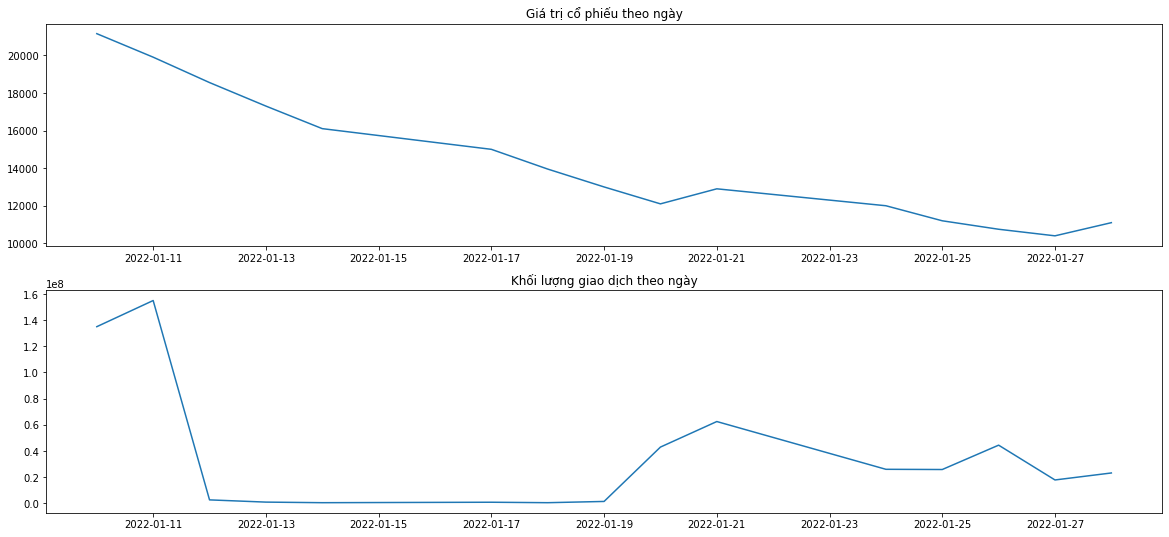

In [6]:
fig, ax = plt.subplots(2,1, figsize=(20,9))
ax[0].plot(df_sub_FLC['Date'],df_sub_FLC['Close'])
ax[0].set_title("Giá trị cổ phiếu theo ngày")

ax[1].plot(df_sub_FLC['Date'],df_sub_FLC['Volume'])
ax[1].set_title("Khối lượng giao dịch theo ngày")

Có thể thấy cả giá trị của cố phiếu và volume giảm mạnh trong khoảng 10 ngày kể từ 10/1/2022, khối lượng giao dịch chỉ bắt đầu tăng khi cổ phiếu về vùng giá khoảng 12,000 VND (nhỏ hơn giá trị sổ sách của FLC)

Bây giờ mình sẽ lấy thêm dữ liệu của 2 cố phiếu nữa cùng "họ FLC" là ROS và ART để xem tương quan giữa các cổ phiếu trong khoảng 2 năm trở lại đây

In [7]:
df_ROS = investpy.get_stock_historical_data(stock='ROS',
                                        country='vietnam',
                                        from_date=start_date,
                                        to_date=current,
                                        order = 'desc')
df_ROS.reset_index(inplace=True)
df_ROS.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2022-08-11,2610.0,2700.0,2500.0,2510.0,14894000,VND
1,2022-08-10,2470.0,2650.0,2310.0,2600.0,14403600,VND
2,2022-08-09,2430.0,2600.0,2430.0,2480.0,35500100,VND
3,2022-08-08,2610.0,2610.0,2610.0,2610.0,2817800,VND
4,2022-08-05,2840.0,2940.0,2780.0,2800.0,7209300,VND


In [8]:
df_ART  = investpy.get_stock_historical_data(stock='ART',
                                        country='vietnam',
                                        from_date=start_date,
                                        to_date=current,
                                        order = 'desc')
df_ART.reset_index(inplace=True)
df_ART.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2022-09-05,4400.0,4400.0,4000.0,4000.0,5127379,VND
1,2022-08-31,4500.0,4500.0,4300.0,4400.0,1508178,VND
2,2022-08-30,4300.0,4600.0,4200.0,4500.0,1782330,VND
3,2022-08-29,4700.0,4700.0,4300.0,4300.0,5539613,VND
4,2022-08-26,5100.0,5100.0,4700.0,4700.0,4190405,VND


In [11]:
#merge 3 cột dữ liệu lại với nhau dự theo Column 'Date'
df_merge = df_FLC[['Date','Close']].merge(df_ROS[['Date','Close']], how='outer', on='Date').merge(df_ART[['Date','Close']],how='outer',on='Date')
df_merge.rename(columns={'Close_x':'FLC','Close_y':'ROS','Close':'ART'}, inplace=True)
df_merge.head()

,Date,FLC,ROS,ART
0,2022-09-05,3720.0,NaN,4000.0
1,2022-08-31,4000.0,NaN,4400.0
2,2022-08-30,4020.0,NaN,4500.0
3,2022-08-29,3890.0,NaN,4300.0
4,2022-08-26,4180.0,NaN,4700.0


In [12]:
#import scatter_matrix từ pandas
from pandas.plotting import scatter_matrix

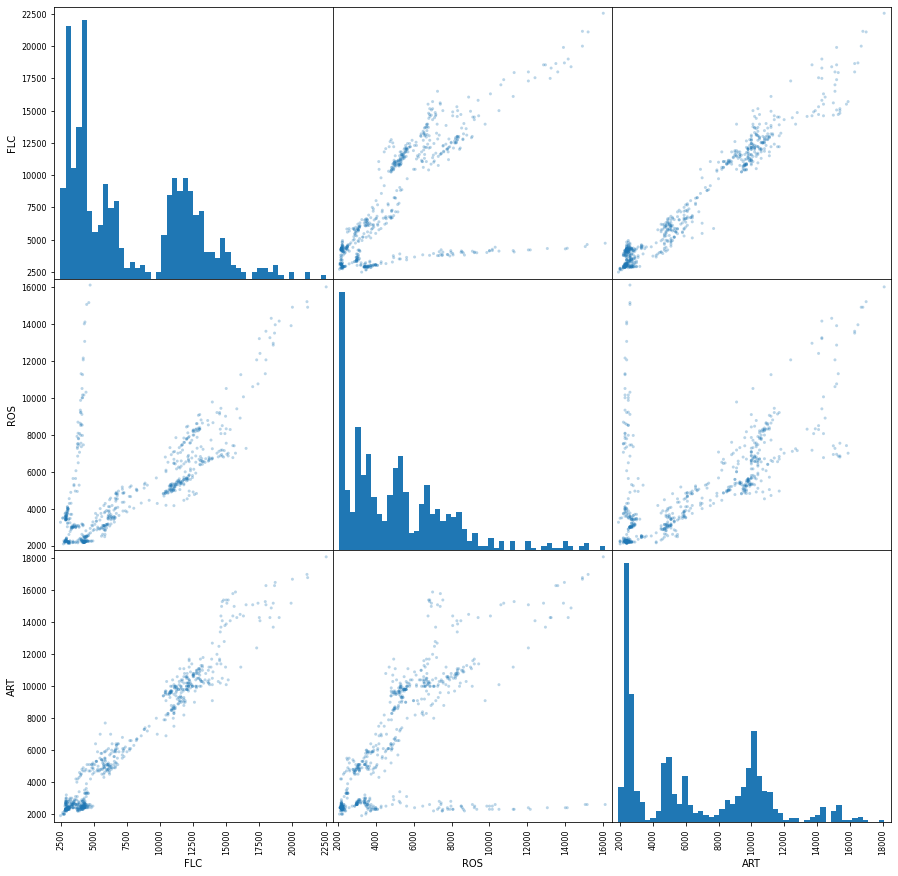

In [13]:
scatter_matrix(df_merge[['FLC','ROS','ART']], figsize=(15,15), hist_kwds={'bins':50}, alpha=0.3)
plt.show()

Nhìn qua ma trận scatter plot, có thể thấy các cổ phiếu mang "họ FLC" có tương quan khá lớn với nhau, nhất là đối với ART và FLC. Mình sẽ không đưa ra đánh giá ở đây mà sẽ để mọi người tự đưa ra nhận định riêng.

Ngoài ra, chúng ta cũng có thể tính return của các cổ phiếu trên dựa trên dữ liệu thu thập được.

In [14]:
df_merge.dropna(inplace=True)

In [15]:
df_merge['FLC_return'] = (df_merge['FLC'] - df_merge['FLC'].shift(1)) / df_merge['FLC'].shift(1)
df_merge['ROS_return'] = (df_merge['ROS'] - df_merge['ROS'].shift(1)) / df_merge['ROS'].shift(1)
df_merge['ART_return'] = (df_merge['ART'] - df_merge['ART'].shift(1)) / df_merge['ART'].shift(1)
df_merge

,Date,FLC,ROS,ART,FLC_return,ROS_return,ART_return
15,2022-08-11,5580.0,2510.0,5400.0,NaN,NaN,NaN
16,2022-08-10,5850.0,2600.0,5500.0,0.048387,0.035857,0.018519
17,2022-08-09,5820.0,2480.0,5500.0,-0.005128,-0.046154,0.000000
18,2022-08-08,5670.0,2610.0,5200.0,-0.025773,0.052419,-0.054545
19,2022-08-05,5850.0,2800.0,5400.0,0.031746,0.072797,0.038462
...,...,...,...,...,...,...,...
662,2020-01-08,4280.0,14000.0,2400.0,-0.006961,0.072797,0.000000
663,2020-01-07,4460.0,15050.0,2600.0,0.042056,0.075000,0.083333
664,2020-01-06,4330.0,14100.0,2400.0,-0.029148,-0.063123,-0.076923
665,2020-01-03,4620.0,15150.0,2600.0,0.066975,0.074468,0.083333


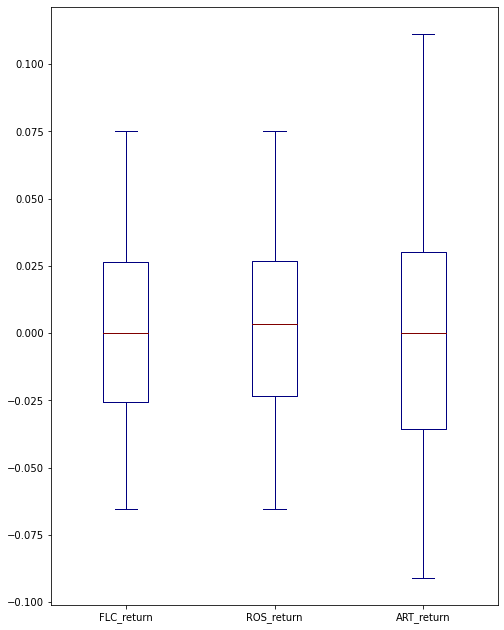

In [16]:
#Chúng ta có thể sử dụng đồ thị hộp để thực hiện phân tích
df_merge[['FLC_return','ROS_return','ART_return']].plot(kind='box',figsize=(8,11), colormap='jet')
plt.show()

Sơ lược thì returns của ART biến động mạnh hơn so với hai cổ phiếu còn lại, nếu chỉ xét riêng yếu tố dữ liệu lịch sử, thì có thể nói ART rủi ro hơn hơn FLC và ROS. Mặc dù nhìn chung giá cổ phiếu của cả 3 đều giảm không phanh sau hàng loạt những tiêu cực diễn ra gần đây.

<h2>Kết thúc</h2>
<p>Ngoài lấy dữ liệu lịch sử của cổ phiếu thì investpy còn cho phép user lấy dữ liệu của VNIndex, giá của trái phiếu chính phủ,... mọi người có thể tìm hiểu thêm trong phần documents của API này. Trong tương lai mình sẽ mở rộng thêm phần tính chi phí vốn theo mô hình CAPM dựa trên dữ liệu thu thập được từ investpy. Cảm ơn mọi người đã dành thời gian cho bài viết của mình.</p>